In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
!wget -q -O 'la_university_data.json' https://data.lacity.org/resource/tip3-gfjj.json
print('Data downloaded!')

Data downloaded!


In [3]:
with open('la_university_data.json') as json_data:
    la_university_data = json.load(json_data)
la_university_data[0]

{'zip_code': '91335-4583',
 ':@computed_region_qz3q_ghft': '18909',
 ':@computed_region_k96s_3jcv': '264',
 'mailing_city': 'LOS ANGELES',
 'city': 'RESEDA',
 ':@computed_region_kqwf_mjcx': '4',
 'business_name': 'A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C',
 ':@computed_region_2dna_qi2s': '12',
 'naics': '611000',
 'primary_naics_description': 'Educational services (including schools, colleges, & universities)',
 'location_description': '18210 SHERMAN 91335-4583',
 ':@computed_region_tatf_ua23': '578',
 'street_address': '18210 SHERMAN WAY #D',
 'mailing_zip_code': '90007-2129',
 'location_start_date': '1991-01-01T00:00:00.000',
 'mailing_address': '2607 VAN BUREN PLACE',
 'location_account': '0000000405-0001-4',
 'council_district': '3',
 'location_1': {'latitude': '34.201',
  'needs_recoding': False,
  'longitude': '-118.5303'}}

In [4]:
la_uni_data=pd.DataFrame(la_university_data)
la_uni_data.head()
la_uni=la_uni_data[['city', 'business_name', 'location_1']]

la_uni=pd.concat([la_uni.drop(['location_1'], axis=1), la_uni['location_1'].apply(pd.Series)], axis=1)
la_uni.rename(columns={'city': 'City', 'business_name': 'Education Facility', 'latitude':'Latitude', 'longitude':'Longitude'}, inplace=True)
la_uni=la_uni[['City', 'Education Facility', 'Latitude', 'Longitude']]
la_uni.head()

,City,Education Facility,Latitude,Longitude
0,RESEDA,A A OFICINA CENTRAL HISPANA DE LOS ANGELES /C,34.201,-118.5303
1,RESEDA,NETANELI HEBREW ACADEMY /C,34.2038,-118.536
2,TARZANA,LYCEE INTERNATIONAL DE LOS ANGELES /C,34.1783,-118.5288
3,WOODLAND HILLS,SCOTT/HOLLY CALIG,34.1526,-118.5783
4,WEST HILLS,SOUTHERN CALIFORNIA CONSERVATORY OF MUSIC CORP...,34.2194,-118.6218


In [5]:
uni_df=la_uni.groupby('City').count()
uni_df

,Education Facility,Latitude,Longitude
City,,,
CANOGA PARK,52,50,50
CHATSWORTH,2,2,2
NORTHRIDGE,2,2,2
RESEDA,58,58,58
TARZANA,81,80,80
WEST HILLS,4,4,4
WINNETKA,36,36,36
WOODLAND HILLS,177,174,174


In [6]:
!wget -q -O 'la_census_data1.json' https://data.lacity.org/resource/ucyn-ru6w.json
print('Data downloaded!')

Data downloaded!


In [25]:
with open('la_census_data1.json') as json_data:
    la_census_data1 = json.load(json_data)

In [9]:
la_data1=pd.DataFrame(la_census_data1)
#la_data['cityname'] = la_data['cityname'].str.replace('city', '')
la_data1.head()

,council_district,pop2010,white_pop,black_pop,ameri_es_pop,asian_pop,hawn_pi_pop,hispanic_pop,other_pop,multi_pop,male_pop,female_pop,age_under5,age_5_9,age_10_14,age_15_19,age_20_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_74,age_75_84,age_85_up,median_age,med_age_male,med_age_female,households,avg_hh_size,householdshsehld,hsehld_1_f,marhh_chd,marhh_no_c,mhh_child,fhh_child,families,avg_family_size,housing_units,vacant,owner_occ,renter_occ
0,1 - Gilbert Cedillo,245216.22,90857.00,7759.13,2991.73,43397.31,243.41,172971.55,88016.11,11951.53,125733.82,119482.40,17684.82,15825.97,16274.35,18528.22,22124.94,43690.39,36967.18,29490.28,21779.51,12261.12,7507.17,3082.27,23.80,23.23,24.46,79014.81,2.29,9919.21,9326.98,17472.38,12582.79,3923.03,8697.64,51391.85,2.68,85219.33,6204.52,15219.58,63795.23
1,10 - Herb J. Wesson Jr.,261297.85,68458.12,67087.07,2307.88,43148.34,308.11,126872.43,68188.27,11800.07,127383.22,133914.63,17464.54,15872.99,16002.86,17760.48,20202.21,45774.95,40715.42,35563.92,25890.49,14316.31,8077.55,3656.14,26.70,25.47,27.80,95915.92,2.05,13147.03,16341.94,17301.48,14284.08,3736.82,10927.24,57677.78,2.52,103637.46,7721.54,21764.30,74151.62
2,11 - Mike Bonin,250726.93,174020.70,13569.60,1214.43,30132.14,521.02,47243.32,18894.80,12374.24,122850.80,127876.13,12912.21,10819.57,10293.89,12293.09,18079.32,47888.78,41225.72,34581.38,29208.43,17584.13,10585.69,5254.73,28.67,28.41,28.99,113864.22,1.61,19434.85,22484.17,17305.63,24708.30,1874.20,4632.45,55447.15,2.07,123048.13,9183.91,50753.74,63110.49
3,12 - Mitchell Englander,258715.95,158939.64,11239.45,1193.56,46815.27,374.43,70827.63,27943.83,12209.77,126366.09,132349.86,12795.71,14149.84,16409.15,20221.50,19350.71,30225.42,34815.25,40495.71,33019.38,19200.82,12678.59,5353.88,33.28,32.21,34.14,86732.07,2.44,7206.04,9337.50,22493.92,26040.98,2137.22,5223.44,63921.59,2.72,90415.80,3683.73,60274.21,26457.86
4,13 - Mitch O'Farrell,247142.04,113391.23,9109.58,2320.07,43740.54,315.72,133038.67,66020.53,12244.39,126882.12,120259.92,13604.88,12094.61,13019.49,15804.39,21508.48,50084.22,40330.45,32614.28,23706.25,13312.35,8003.20,3059.46,25.73,25.20,26.39,94906.83,1.93,17101.47,15325.45,15096.73,14479.35,3100.50,7569.90,49457.04,2.48,102632.78,7725.95,13638.56,81268.27


In [28]:
la_data1=la_data1.groupby('median_age').count()
la_data1.head()

,council_district,pop2010,white_pop,black_pop,ameri_es_pop,asian_pop,hawn_pi_pop,hispanic_pop,other_pop,multi_pop,male_pop,female_pop,age_under5,age_5_9,age_10_14,age_15_19,age_20_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_74,age_75_84,age_85_up,med_age_male,med_age_female,households,avg_hh_size,householdshsehld,hsehld_1_f,marhh_chd,marhh_no_c,mhh_child,fhh_child,families,avg_family_size,housing_units,vacant,owner_occ,renter_occ
median_age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20.74,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
21.89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
22.38,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
23.80,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
24.12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
!wget -q -O 'la_census_data.json' https://data.lacounty.gov/resource/rv2f-zsc7.json
print('Data downloaded!')

Data downloaded!


In [11]:
with open('la_census_data.json') as json_data:
    la_census_data = json.load(json_data)

In [12]:
la_census_data[0]

{'census_tract': '980030',
 'fips': '22412',
 'cityname': 'El Segundo city',
 'service_area': '8',
 'age_0_15': '0',
 'age_16_18': '0',
 'age_19_20': '0',
 'age_21_25': '0',
 'age_26_59': '0',
 'age_60_64': '0',
 'age_65up': '0',
 'male': '0',
 'female': '0',
 'white': '0',
 'african_american': '0',
 'native_american': '0',
 'asian': '0',
 'pacific_islander': '0',
 'other': '0',
 'multi_race': '0',
 'latino': '0'}

In [13]:
la_data=pd.DataFrame(la_census_data)
la_data['cityname'] = la_data['cityname'].str.replace('city', '')
la_data.head()

,census_tract,fips,cityname,service_area,age_0_15,age_16_18,age_19_20,age_21_25,age_26_59,age_60_64,age_65up,male,female,white,african_american,native_american,asian,pacific_islander,other,multi_race,latino
0,980030,22412,El Segundo,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,400604,30014,Glendora,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,910804,55156,Palmdale,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,403312,58072,Pomona,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,408211,36490,Industry,3,6,2,0,2,12,0,8,14,16,14,0,0,14,0,0,0,2


In [17]:
la_data['age_19_20'] = la_data['age_19_20'].apply(pd.to_numeric)
la_data['age_21_25'] = la_data['age_21_25'].apply(pd.to_numeric)
la_data['Youth'] = la_data['age_19_20'] + la_data['age_21_25']

final_df = la_data.sort_values(by=['Youth'], ascending=False).reset_index(drop=True)

final_df=final_df[['census_tract', 'cityname', 'Youth']]

final_df.rename(columns={'census_tract': 'Population', 'cityname': 'Neighborhood'}, inplace=True)

final_df=final_df.groupby('Neighborhood').sum()
final_df=final_df.sort_values(by=['Youth'], ascending=False).reset_index()
final_df=final_df[['Neighborhood', 'Youth']]
final_df.set_index('Neighborhood')

final_df=final_df.head(15)

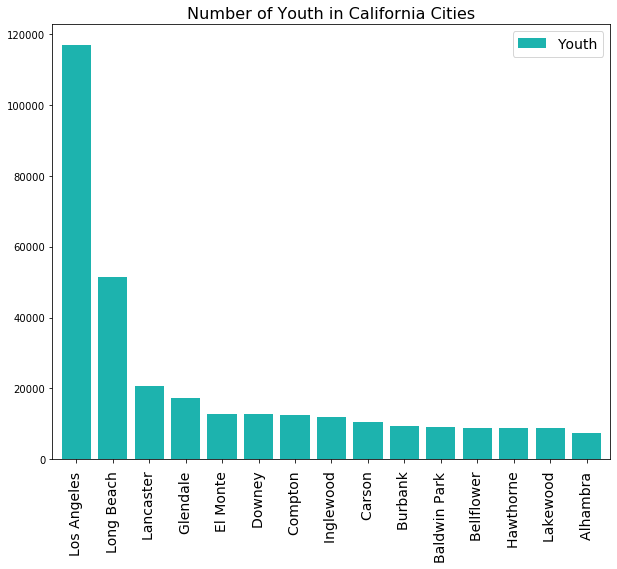

In [18]:
x = np.arange(15)

ax = final_df.plot(kind='bar', alpha=1, figsize=(10, 8), color=['#1db3ae'], width=0.8, )

ax.set_title("Number of Youth in California Cities" , fontsize='16')
ax.legend(loc='upper right', fontsize='14')
plt.xticks(x, (final_df['Neighborhood']), fontsize='14')
plt.yticks()
ax.set_facecolor('w')

In [19]:
final_df2=la_data[['cityname','age_19_20','age_21_25']]
final_df2.rename(columns={'cityname': 'Neighborhood','age_19_20': 'Age 19-20','age_21_25': 'Age 21-25' }, inplace=True)
final_df2=final_df2.groupby('Neighborhood').sum()
final_df2=final_df2.sort_values(by=['Age 19-20'], ascending=False).reset_index()
final_df2.set_index('Neighborhood')
final_df2=final_df2.head(15)
final_df2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood,Age 19-20,Age 21-25
0,Los Angeles,32061,84815
1,Long Beach,14540,36986
2,Lancaster,5797,14967
3,Glendale,4309,12927
4,El Monte,3634,9224
5,Downey,3591,9231
6,Compton,3541,8894
7,Inglewood,3357,8628
8,Claremont,3302,3842
9,Carson,3040,7550


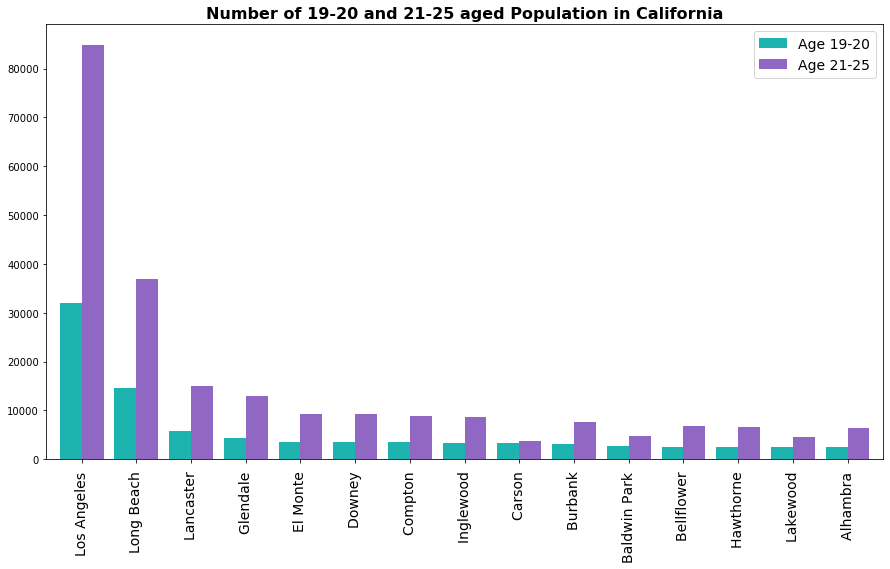

In [22]:
x = np.arange(15)

ax = final_df2.plot(kind='bar', alpha=1, figsize=(15, 8), color=['#1db3ae', '#9068c4'], width=0.8, )

ax.set_title("Number of 19-20 and 21-25 aged Population in California" , fontsize='16', fontweight='bold')
ax.legend(loc='upper right', fontsize='14')
plt.xticks(x, (final_df['Neighborhood']), fontsize='14')
plt.yticks()
ax.set_facecolor('w')

### Now we can start editing our geolocations to create clusters

In [21]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

\ 

ModuleNotFoundError: No module named 'geopy'

In [11]:
la_geo = pd.read_csv("https://usc.data.socrata.com/api/views/9utn-waje/rows.csv?accessType=DOWNLOAD")
#la_geo.drop(['name_1', 'slug_1'], axis=1, inplace=True)
la_geo=la_geo[['name','sqmi', 'latitude', 'longitude']]
la_geo.rename(columns={'name': 'Neighborhood', 'sqmi': 'SQMI', 'latitude': 'Longitude', 'longitude': 'Latitude'}, inplace=True)
la_geo.head()

,Neighborhood,SQMI,Longitude,Latitude
0,Acton,39.339109,-118.169810,34.497355
1,Adams-Normandie,0.805350,-118.300208,34.031461
2,Agoura Hills,8.146760,-118.759885,34.146736
3,Agua Dulce,31.462632,-118.317104,34.504927
4,Alhambra,7.623814,-118.136512,34.085539


In [12]:
la_geo.shape

(272, 4)

In [13]:
address = 'Los Angeles City, LA'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles City are 34.0536909, -118.2427666.


In [14]:
map_la = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(la_geo['Latitude'], la_geo['Longitude'], la_geo['Neighborhood']):
    label = '{}, LA County'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#2ac7ba',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
map_la

In [15]:
CLIENT_ID = 'ARD3ZA1OZ2OHUXJYIEXR4S1LJWBLYS0C1LIKRRSZRMULZ1GA' 
CLIENT_SECRET = 'UL4BY5HE4MIMNBEI1I0AUKUKSSI5J5BPZL3OKCD00GJB2RWB' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET) 

Your credentails:
CLIENT_ID: ARD3ZA1OZ2OHUXJYIEXR4S1LJWBLYS0C1LIKRRSZRMULZ1GA
CLIENT_SECRET:UL4BY5HE4MIMNBEI1I0AUKUKSSI5J5BPZL3OKCD00GJB2RWB


In [16]:
nbhd_latitude = la_geo.loc[114, 'Latitude'] # neighborhood latitude value
nbhd_longitude = la_geo.loc[114, 'Longitude'] # neighborhood longitude value

nbhd_name = la_geo.loc[114, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(nbhd_name, 
                                                               nbhd_latitude, 
                                                               nbhd_longitude))


Latitude and longitude values of Hollywood are 34.09440849999958, -118.33555159977072.


In [17]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nbhd_latitude, 
    nbhd_longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Fat Sal's,Sandwich Place,34.094536,-118.338136
1,Las Palmas Market,Liquor Store,34.094344,-118.336464
2,Blossom Spa,Spa,34.095953,-118.338486
3,Wanderlust Hollywood,Yoga Studio,34.095953,-118.339080
4,L.A. Gay And Lesbian Center,Performing Arts Venue,34.091782,-118.337582


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

62 venues were returned by Foursquare.


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
la_venues = getNearbyVenues(names=la_geo['Neighborhood'],
                                   latitudes=la_geo['Latitude'],
                                   longitudes=la_geo['Longitude']
                                  )
print(la_venues.shape)
la_venues.head()

Acton
Adams-Normandie
Agoura Hills
Agua Dulce
Alhambra
Alondra Park
Artesia
Altadena
Angeles Crest
Arcadia
Arleta
Arlington Heights
Athens
Atwater Village
Avalon
Avocado Heights
Azusa
Vermont-Slauson
Baldwin Hills/Crenshaw
Baldwin Park
Bel-Air
Bellflower
Bell Gardens
Green Valley
Bell
Beverly Crest
Beverly Grove
Burbank
Koreatown
Beverly Hills
Beverlywood
Boyle Heights
Bradbury
Brentwood
Broadway-Manchester
Calabasas
Canoga Park
Carson
Carthay
Castaic Canyons
Chatsworth
Castaic
Central-Alameda
Century City
Cerritos
Charter Oak
Chatsworth Reservoir
Chesterfield Square
Cheviot Hills
Chinatown
Citrus
Claremont
Northridge
Commerce
Compton
Cypress Park
La Mirada
Covina
Cudahy
Culver City
Del Aire
Del Rey
Desert View Highlands
Diamond Bar
Downey
Downtown
Duarte
Eagle Rock
East Compton
East Hollywood
East La Mirada
Elizabeth Lake
East Los Angeles
East Pasadena
East San Gabriel
Echo Park
El Monte
El Segundo
El Sereno
Elysian Park
Elysian Valley
Vermont Square
Encino
Exposition Park
Fairfax
Flo

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,34.497355,-118.169810,Epik Engineering,34.498718,-118.168046,Construction & Landscaping
1,Acton,34.497355,-118.169810,Alma Gardening Co.,34.494762,-118.172550,Construction & Landscaping
2,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant
3,Adams-Normandie,34.031461,-118.300208,Shell,34.033095,-118.300025,Gas Station
4,Adams-Normandie,34.031461,-118.300208,Little Xian,34.032292,-118.299465,Sushi Restaurant


In [24]:
la_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Acton,2,2,2,2,2,2
Adams-Normandie,8,8,8,8,8,8
Agoura Hills,26,26,26,26,26,26
Agua Dulce,1,1,1,1,1,1
Alhambra,13,13,13,13,13,13
Alondra Park,2,2,2,2,2,2
Altadena,6,6,6,6,6,6
Arcadia,25,25,25,25,25,25
Arleta,5,5,5,5,5,5


In [25]:
print('There are {} uniques categories.'.format(len(la_venues['Venue Category'].unique())))

There are 322 uniques categories.


In [26]:
# one hot encoding
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

,Yoga Studio,ATM,Accessories Store,Airport,Airport Terminal,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Check Cashing Service,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,College Theater,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donburi Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Notary,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Reservoir,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,S

In [27]:
la_onehot.shape

(2975, 322)

In [28]:
la_onehot.shape
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()

In [29]:
la_grouped.shape

(235, 322)

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

for hood in la_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acton----
                           venue  freq
0     Construction & Landscaping   1.0
1                    Yoga Studio   0.0
2                         Office   0.0
3          Performing Arts Venue   0.0
4                           Park   0.0
5  Paper / Office Supplies Store   0.0
6              Other Repair Shop   0.0
7           Other Great Outdoors   0.0
8                Organic Grocery   0.0
9                   Optical Shop   0.0


----Adams-Normandie----
                  venue  freq
0      Sushi Restaurant  0.38
1            Taco Place  0.12
2         Grocery Store  0.12
3           Gas Station  0.12
4            Playground  0.12
5                  Park  0.12
6     Other Repair Shop  0.00
7  Other Great Outdoors  0.00
8       Organic Grocery  0.00
9          Optical Shop  0.00


----Agoura Hills----
                  venue  freq
0  Fast Food Restaurant  0.12
1    Chinese Restaurant  0.08
2        Breakfast Spot  0.08
3           Gas Station  0.04
4             BBQ Joint  0.0

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,Construction & Landscaping,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,Adams-Normandie,Sushi Restaurant,Park,Gas Station,Grocery Store,Taco Place,Playground,Falafel Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
2,Agoura Hills,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Brewery,Sushi Restaurant,Thai Restaurant,Hotel,BBQ Joint,Lounge
3,Agua Dulce,Airport,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,Alhambra,Convenience Store,Sporting Goods Shop,Pet Store,Fast Food Restaurant,Hardware Store,Video Store,Pizza Place,Bagel Shop,Mexican Restaurant,Breakfast Spot


In [33]:
# set number of clusters
kclusters = 5

la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 2, 0, 4, 2, 2, 2, 2], dtype=int32)

In [34]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

la_merged = la_geo


la_merged = la_geo.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

la_merged.dropna(subset = ["Cluster Labels"], inplace=True)
la_merged['Cluster Labels'] =la_merged['Cluster Labels'].astype(int)
la_merged.head()

,Neighborhood,SQMI,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acton,39.339109,-118.169810,34.497355,1,Construction & Landscaping,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
1,Adams-Normandie,0.805350,-118.300208,34.031461,2,Sushi Restaurant,Park,Gas Station,Grocery Store,Taco Place,Playground,Falafel Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
2,Agoura Hills,8.146760,-118.759885,34.146736,2,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Brewery,Sushi Restaurant,Thai Restaurant,Hotel,BBQ Joint,Lounge
3,Agua Dulce,31.462632,-118.317104,34.504927,2,Airport,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,Alhambra,7.623814,-118.136512,34.085539,0,Convenience Store,Sporting Goods Shop,Pet Store,Fast Food Restaurant,Hardware Store,Video Store,Pizza Place,Bagel Shop,Mexican Restaurant,Breakfast Spot


In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['Latitude'], la_merged['Longitude'], la_merged['Neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
la_merged.loc[la_merged['Cluster Labels'] == 0, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,SQMI,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,7.623814,Convenience Store,Sporting Goods Shop,Pet Store,Fast Food Restaurant,Hardware Store,Video Store,Pizza Place,Bagel Shop,Mexican Restaurant,Breakfast Spot
14,2.744697,Playground,Mexican Restaurant,American Restaurant,Golf Course,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant
15,2.948459,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Liquor Store,Taco Place,Diner,Discount Store,Pizza Place,Bakery,Grocery Store
19,6.778016,Italian Restaurant,Mexican Restaurant,Thrift / Vintage Store,Liquor Store,Business Service,Latin American Restaurant,Home Service,Flea Market,Flower Shop,English Restaurant
21,6.195312,Pizza Place,Sandwich Place,Mobile Phone Shop,Mexican Restaurant,Fast Food Restaurant,Supermarket,Donburi Restaurant,Grocery Store,Pharmacy,Chinese Restaurant
22,2.480285,Mexican Restaurant,Sporting Goods Shop,Grocery Store,Bus Stop,Men's Store,Fried Chicken Joint,Fast Food Restaurant,Seafood Restaurant,Park,Donut Shop
27,17.341842,Mexican Restaurant,Deli / Bodega,Rental Service,Spa,Sandwich Place,Fast Food Restaurant,Tanning Salon,Concert Hall,Bakery,Racetrack
34,1.558486,Moving Target,Liquor Store,Mexican Restaurant,Gym,Gym / Fitness Center,Farmers Market,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant
36,4.348518,Mexican Restaurant,Sports Bar,Automotive Shop,Ice Cream Shop,Liquor Store,Restaurant,Garden Center,Sushi Restaurant,Farmers Market,Ethiopian Restaurant
42,2.182695,Performing Arts Venue,Mexican Restaurant,Donut Shop,Park,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant


In [37]:
la_merged.loc[la_merged['Cluster Labels'] == 1, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,SQMI,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,39.339109,Construction & Landscaping,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
94,15.111432,Construction & Landscaping,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
104,3.101985,Construction & Landscaping,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
128,6.958198,Construction & Landscaping,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
197,8.855452,Clothing Store,Construction & Landscaping,Women's Store,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm


In [38]:
la_merged.loc[la_merged['Cluster Labels'] == 2, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,SQMI,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,0.805350,Sushi Restaurant,Park,Gas Station,Grocery Store,Taco Place,Playground,Falafel Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
2,8.146760,Fast Food Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Brewery,Sushi Restaurant,Thai Restaurant,Hotel,BBQ Joint,Lounge
3,31.462632,Airport,Women's Store,Filipino Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
6,1.632204,Indian Restaurant,Chinese Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Tea Room,Salon / Barbershop,Taiwanese Restaurant,Gift Shop,Thai Restaurant,BBQ Joint
7,8.710338,Notary,Food,Bakery,Business Service,Pharmacy,Campground,Women's Store,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant
9,11.150797,Cosmetics Shop,Bubble Tea Shop,Gym,Tea Room,Convenience Store,Football Stadium,Mexican Restaurant,Fast Food Restaurant,Shabu-Shabu Restaurant,Chinese Restaurant
10,3.096179,Bakery,Mobile Phone Shop,Historic Site,Convenience Store,Video Store,Women's Store,Fast Food Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop
11,1.031415,Donut Shop,Karaoke Bar,Intersection,Latin American Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Grocery Store,Pharmacy,Fried Chicken Joint,Bus Station
13,1.776894,Taco Place,Mediterranean Restaurant,Gym / Fitness Center,Mobile Phone Shop,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Electronics Store,Bar,Bank
16,9.871436,Thrift / Vintage Store,Liquor Store,Big Box Store,Pharmacy,Home Service,Pizza Place,Coffee Shop,Women's Store,Farm,English Restaurant


In [39]:
la_merged.loc[la_merged['Cluster Labels'] == 3, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,SQMI,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,30.627983,Trail,Women's Store,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
161,1.850404,Trail,Garden,Park,Flower Shop,Flea Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop
191,13.394048,Trail,Women's Store,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
211,2.968794,Trail,Coffee Shop,Gourmet Shop,Women's Store,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant
235,10.015818,Lake,Trail,Farmers Market,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm
241,89.256083,Trail,Women's Store,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market


In [40]:
la_merged.loc[la_merged['Cluster Labels'] == 4, la_merged.columns[[1] + list(range(5, la_merged.shape[1]))]]

,SQMI,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,1.139894,Park,Home Service,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
18,2.883705,Park,Food,Clothing Store,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm
40,15.243597,Playground,Park,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
45,0.921541,Moving Target,Home Service,Park,Food,Farmers Market,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant
96,11.887054,Park,Weight Loss Center,Fast Food Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm
102,0.640666,Park,Dance Studio,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
115,3.034667,Burger Joint,Fried Chicken Joint,Park,Women's Store,Fast Food Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm
122,3.426444,Park,Dance Studio,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
135,8.572950,Pool,Park,Women's Store,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm
155,3.187498,Park,Church,Home Service,Fast Food Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm
